In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import random
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

### Chi Sq distribution is made up of sum of squares of independent Z distributions

##### Chi SQ df = 1

In [3]:
Z = np.random.normal(loc=0,scale=1,size = 10000)

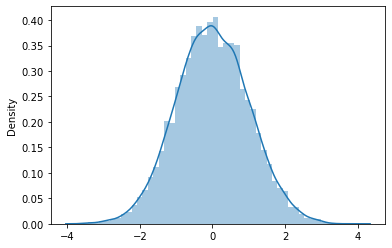

In [4]:
sns.distplot(Z);

In [5]:
ChiSq1 = Z**2

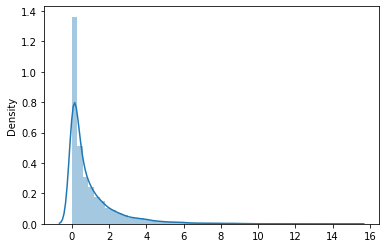

In [6]:
sns.distplot(ChiSq1);

In [7]:
min(ChiSq1), max(ChiSq1)

(1.4378650173094134e-08, 15.00798380439543)

In [8]:
# compare Zsquare against ChiSq distribution by taking a value and checking area to left
vals = np.array([-1,0,1,2,3,4,5])

In [9]:
for i in vals:
    print("val: ", i, " from chisq dist: ",round(stats.chi2.cdf(i,df=1),3), "\t from Z square: ", np.sum(ChiSq1 < i)/1000)

val:  -1  from chisq dist:  0.0 	 from Z square:  0.0
val:  0  from chisq dist:  0.0 	 from Z square:  0.0
val:  1  from chisq dist:  0.683 	 from Z square:  6.817
val:  2  from chisq dist:  0.843 	 from Z square:  8.462
val:  3  from chisq dist:  0.917 	 from Z square:  9.191
val:  4  from chisq dist:  0.954 	 from Z square:  9.56
val:  5  from chisq dist:  0.975 	 from Z square:  9.753


##### Chi Sq df = 2

In [10]:
Z1 = np.random.normal(loc=0,scale=1,size = 10000)
Z2 = np.random.normal(loc=0,scale=1,size = 10000)
ChiSq2 = Z1**2 + Z2**2

In [11]:
# compare Zsquare against ChiSq distribution by taking a value and checking area to left
vals = np.array([-1,0,1,2,3,4,5,10])
for i in vals:
    print("val: ", i, " from chisq dist: ",round(stats.chi2.cdf(i,df=2),3), "\t from Z square: ", np.sum(ChiSq2 < i)/1000)

val:  -1  from chisq dist:  0.0 	 from Z square:  0.0
val:  0  from chisq dist:  0.0 	 from Z square:  0.0
val:  1  from chisq dist:  0.393 	 from Z square:  3.924
val:  2  from chisq dist:  0.632 	 from Z square:  6.391
val:  3  from chisq dist:  0.777 	 from Z square:  7.85
val:  4  from chisq dist:  0.865 	 from Z square:  8.69
val:  5  from chisq dist:  0.918 	 from Z square:  9.207
val:  10  from chisq dist:  0.993 	 from Z square:  9.938


##### Chisq df = 3 

In [12]:
Z1 = np.random.normal(loc=0,scale=1,size = 10000)
Z2 = np.random.normal(loc=0,scale=1,size = 10000)
Z3 = np.random.normal(loc=0,scale=1,size = 10000)
ChiSq3 = Z1**2 + Z2**2 + Z3**2

In [13]:
# compare Zsquare against ChiSq distribution by taking a value and checking area to left
vals = np.array([-1,0,1,2,3,4,5])
for i in vals:
    print("val: ", i, " from chisq dist: ",round(stats.chi2.cdf(i,df=3),3), "\t from Z square: ", np.sum(ChiSq3 < i)/1000)

val:  -1  from chisq dist:  0.0 	 from Z square:  0.0
val:  0  from chisq dist:  0.0 	 from Z square:  0.0
val:  1  from chisq dist:  0.199 	 from Z square:  1.994
val:  2  from chisq dist:  0.428 	 from Z square:  4.258
val:  3  from chisq dist:  0.608 	 from Z square:  6.062
val:  4  from chisq dist:  0.739 	 from Z square:  7.364
val:  5  from chisq dist:  0.828 	 from Z square:  8.306


In [45]:
# compare using QQ plot

# https://towardsdatascience.com/how-to-verify-the-distribution-of-data-using-q-q-plots-acdb7ca2d576

In [15]:
# theoretical chi sq
chisqdat = np.random.chisquare(df = 3, size = 10000)
normdat = np.random.normal(size = 10000)

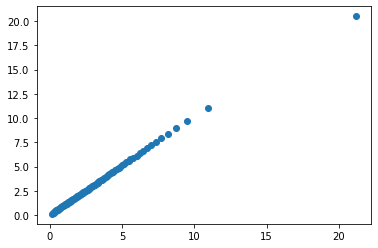

In [16]:
d1_100 = []
for i in range(1,101):
    d1_100.append(np.percentile(ChiSq3, i))
    
d2_100 = []
for i in range(1,101):
    d2_100.append(np.percentile(chisqdat, i))
    
d3_100 = []
for i in range(1,101):
    d3_100.append(np.percentile(normdat, i))

plt.scatter(d1_100,d2_100)

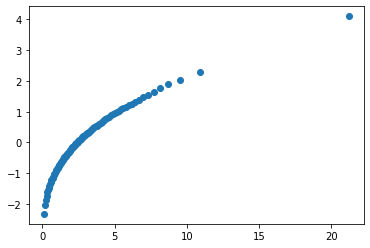

In [17]:
plt.scatter(d1_100,d3_100)

##### Mean and Variance of Chisq distributions

Mean of Chi Sq distribution is same as its df

Var of Chi Sq distribution is 2*df

In [18]:
print("df:1 ", "mean= ", np.mean(ChiSq1), "var= ", np.var(ChiSq1))
print("df:2 ", "mean= ", np.mean(ChiSq2), "var= ", np.var(ChiSq2))
print("df:3 ", "mean= ", np.mean(ChiSq3), "var= ", np.var(ChiSq3))

df:1  mean=  0.9929299554624824 var=  1.9232688068440646
df:2  mean=  1.9791024006036393 var=  3.9013913685654353
df:3  mean=  2.9851729128967657 var=  5.7989042526764925


In [19]:
chisqdat = np.random.chisquare(df = 3, size = 10000)
np.mean(chisqdat), np.var(chisqdat)

(3.006696672778534, 6.04785968792446)

##### chi sq distributions are right skewed, the skew reduces as df increases

In [20]:
pd.Series(ChiSq1).skew(), pd.Series(ChiSq2).skew(), pd.Series(ChiSq3).skew()

(2.7105084993853152, 2.0583293368076823, 1.5893573739791569)

##### at df = 50 it is almost normal distribution

0.40224994723087887


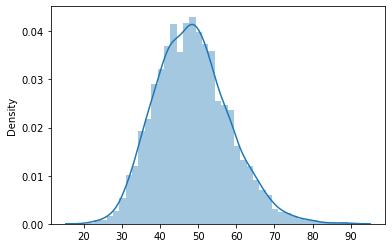

In [21]:
df=50
ChiSq50 = pd.Series(stats.chi2.ppf(np.random.normal(size=10000),df=df))
print(ChiSq50.skew())
sns.distplot(ChiSq50);

In [22]:
stats.shapiro(ChiSq50)

ShapiroResult(statistic=nan, pvalue=1.0)

### Basic fetches from Chi Sq distribution

In [55]:
stats.chi2.cdf(7.8147, df=3) # given chisq get area to left

0.94999937471524

In [56]:
stats.chi2.ppf(0.95,df=3) # given area to left get chisq

7.814727903251179

In [78]:
stats.chi2.isf(0.05,df=3) # given area to right get chisq

7.814727903251178

In [81]:
stats.chi2.sf(7.8147,df=3) # given chisq get area to right

0.050000625284760056

In [57]:
# Sample code to set up critical values
df = 7
stats.chi2.ppf(0.025,df), stats.chi2.ppf(0.975,df)

(1.689869180677355, 16.012764274629326)